# Project - Thera Bank Personal Loan Campaign

# Context: 
    
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget

# Problem:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

Data:

ID: Customer ID  <br>
Age: Customer's age in completed years <br>
Experience: #years of professional experience <br>
Income: Annual income of the customer (000)   <br>
ZIP Code: Home Address ZIP code.  <br>
Family: Family size of the customer <br>
CCAvg: Avg. spending on credit cards per month (000)  <br>
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional <br>
Mortgage: Value of house mortgage if any. (000) <br>
Personal Loan: Did this customer accept the personal loan offered in the last campaign? <br>
Securities Account: Does the customer have a securities account with the bank? <br>
CD Account: Does the customer have a certificate of deposit (CD) account with the bank? <br>
Online: Does the customer use internet banking facilities? <br>
Credit card: Does the customer use a credit card issued by the bank? <br>



### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [585]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [582]:
# Data Types
print(df.info())
#Statistical Summary
print(df.describe())
#Shape
print(df.shape)
#Check for nulls
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
           ID     Age  Experience  Income  ZIP Code

In [586]:
#incorrect imputation - Experience has negative Number, change negative no to Zero
df['Income']= df['Income'] * 1000
df['CCAvg']= df['CCAvg'] * 1000
df['Mortgage']= df['Mortgage'] * 1000
pl_df = df.clip(lower=0)
pl_df.describe()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.12,73774.20,93152.50,2.40,1937.94,1.88,56498.80,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.44,46033.73,2121.85,1.15,1747.66,0.84,101713.80,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,0.00,8000.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39000.00,91911.00,1.00,700.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64000.00,93437.00,2.00,1500.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98000.00,94608.00,3.00,2500.00,3.00,101000.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224000.00,96651.00,4.00,10000.00,3.00,635000.00,1.00,1.00,1.00,1.00,1.00


In [587]:
#Converting 1 and 0 to True and False, for better classification
#pl_df['Personal Loan'] = df['Personal Loan'].map({1: True, 0: False})
#pl_df['Securities Account'] = df['Securities Account'].map({1: True, 0: False})
#pl_df['CD Account'] = df['CD Account'].map({1: True, 0: False})
#pl_df['Online'] = df['Online'].map({1: True, 0: False})
#pl_df['CreditCard'] = df['CreditCard'].map({1: True, 0: False})
#Convert into Category variable
pl_df['Experience'] = pl_df['Experience'].astype('category')
pl_df['Family'] = pl_df['Family'].astype('category')
pl_df['Education'] = pl_df['Education'].astype('category')
pl_df['Personal Loan'] = pl_df['Personal Loan'].astype('category')
pl_df['Securities Account'] = pl_df['Securities Account'].astype('category')
pl_df['CD Account'] = pl_df['CD Account'].astype('category')
pl_df['Online'] = pl_df['Online'].astype('category')
pl_df['CreditCard'] = pl_df['CreditCard'].astype('category')
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   category
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.9 KB


In [235]:
pl_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


### 2. EDA: Study the data distribution in each attribute and target variable, share your findings

**#Number of unique in each column**

In [12]:
pl_df.nunique()
# To check number of unique values in a particular column

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**#Number of people with zero mortgage**

In [22]:
#pl_df.astype(bool).sum(axis=0)
#pl_df.isin([0]).sum()
pl_df.isin({'Mortgage':[0]}).sum()

Age                      0
Experience               0
Income                   0
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage              3462
Personal Loan            0
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
dtype: int64

**#Number of people with zero credit card spending per month**

In [236]:
#pl_df.astype(bool).sum(axis=0)
#pl_df.isin([0]).sum()
pl_df.isin({'CCAvg':[0]}).sum()

ID                      0
Age                     0
Experience              0
Income                  0
ZIP Code                0
Family                  0
CCAvg                 106
Education               0
Mortgage                0
Personal Loan           0
Securities Account      0
CD Account              0
Online                  0
CreditCard              0
dtype: int64

**#Value counts of all categorical columns**

In [185]:
#Check if Data is skewed
for i in list(pl_df.columns[pl_df.dtypes=='category']):   # checking value counts of all object type columns
    print(pl_df[i].value_counts(normalize = True))
    print()
    
#print(pl_df['Education'].value_counts(normalize = True))
#print(pl_df['Personal Loan'].value_counts())
#print(pl_df['Securities Account'].value_counts())
#print(pl_df['CD Account'].value_counts())
#print(pl_df['Online'].value_counts())
#print(pl_df['CreditCard'].value_counts())

32   0.03
20   0.03
9    0.03
5    0.03
23   0.03
35   0.03
25   0.03
28   0.03
18   0.03
19   0.03
26   0.03
24   0.03
3    0.03
14   0.03
16   0.03
30   0.03
27   0.03
17   0.03
34   0.03
29   0.02
22   0.02
7    0.02
15   0.02
8    0.02
6    0.02
0    0.02
10   0.02
33   0.02
13   0.02
37   0.02
11   0.02
36   0.02
4    0.02
21   0.02
31   0.02
12   0.02
38   0.02
39   0.02
2    0.02
1    0.01
40   0.01
41   0.01
42   0.00
43   0.00
Name: Experience, dtype: float64

1   0.29
2   0.26
4   0.24
3   0.20
Name: Family, dtype: float64

1   0.42
3   0.30
2   0.28
Name: Education, dtype: float64

0   0.90
1   0.10
Name: Personal Loan, dtype: float64

0   0.90
1   0.10
Name: Securities Account, dtype: float64

0   0.94
1   0.06
Name: CD Account, dtype: float64

1   0.60
0   0.40
Name: Online, dtype: float64

0   0.71
1   0.29
Name: CreditCard, dtype: float64



**#Univariate and Bivariate**

AxesSubplot(0.125,0.125;0.775x0.755)


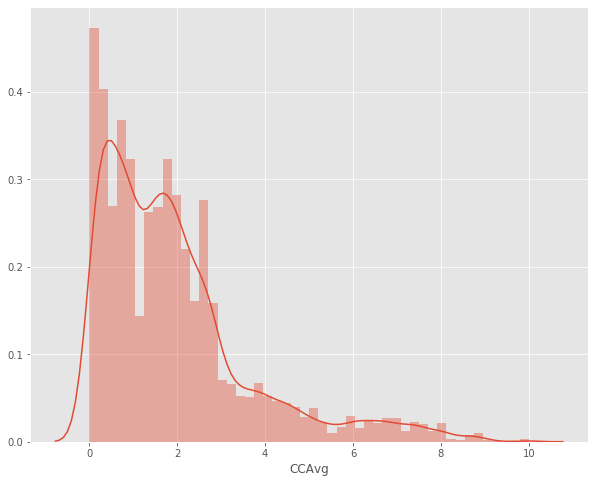

In [50]:
#Univariate
print(sns.distplot(pl_df['CCAvg']));

AxesSubplot(0.125,0.125;0.775x0.755)


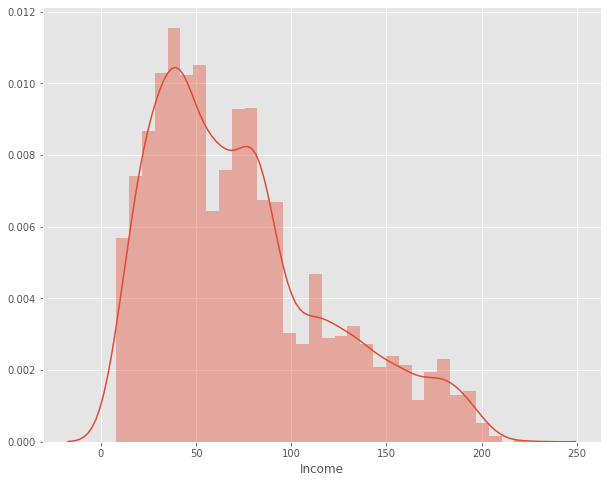

In [49]:
#Univariate
print(sns.distplot(pl_df['Income']))

AxesSubplot(0.125,0.125;0.775x0.755)


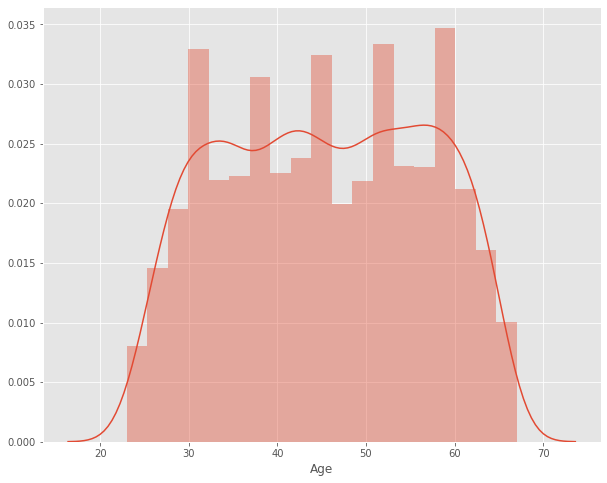

In [52]:
#Univariate
print(sns.distplot(pl_df['Age']))

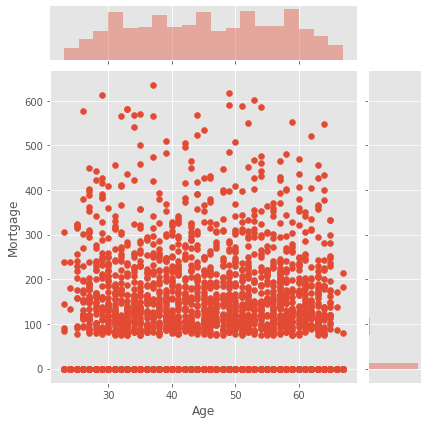

In [63]:
#Bivariate
sns.jointplot(pl_df['Age'], pl_df['Mortgage']);

**Get data model ready**

In [203]:
#Drawing relationship between various accounts and personal loan
print(pl_df.groupby(['Personal Loan'])['Securities Account'].value_counts())
print(pl_df.groupby(['CD Account'])['Personal Loan'].value_counts())
print(pl_df.groupby(['Online'])['Personal Loan'].value_counts())
print(pl_df.groupby(['CreditCard'])['Personal Loan'].value_counts())
print(pl_df.groupby(['CD Account','CreditCard'])['Personal Loan'].value_counts())
print(pl_df.groupby(['Personal Loan','CD Account','CreditCard','Securities Account'])['Online'].value_counts())

Personal Loan  Securities Account
0              0                     4058
               1                      462
1              0                      420
               1                       60
Name: Securities Account, dtype: int64
CD Account  Personal Loan
0           0                4358
            1                 340
1           0                 162
            1                 140
Name: Personal Loan, dtype: int64
Online  Personal Loan
0       0                1827
        1                 189
1       0                2693
        1                 291
Name: Personal Loan, dtype: int64
CreditCard  Personal Loan
0           0                3193
            1                 337
1           0                1327
            1                 143
Name: Personal Loan, dtype: int64
CD Account  CreditCard  Personal Loan
0           0           0                3178
                        1                 290
            1           0                1180
               

In [826]:
#incorrect imputation - Experience has negative Number, change negative no to Zero
pl_df = df.clip(lower=0)
pl_df.describe()
pl_df['Experience'] = pl_df['Experience'].astype('category')
pl_df['Family'] = pl_df['Family'].astype('category')
pl_df['Education'] = pl_df['Education'].astype('category')
pl_df['Personal Loan'] = pl_df['Personal Loan'].astype('category')
pl_df['Securities Account'] = pl_df['Securities Account'].astype('category')
pl_df['CD Account'] = pl_df['CD Account'].astype('category')
pl_df['Online'] = pl_df['Online'].astype('category')
pl_df['CreditCard'] = pl_df['CreditCard'].astype('category')
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   category
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.9 KB


**Iteration 1 - Remove ID and Zip code**

In [827]:
#incorrect imputation - Experience has negative Number, change negative no to Zero
pl_df = df.clip(lower=0)
pl_df.describe()
pl_df['Experience'] = pl_df['Experience'].astype('category')
pl_df['Family'] = pl_df['Family'].astype('category')
pl_df['Education'] = pl_df['Education'].astype('category')
pl_df['Personal Loan'] = pl_df['Personal Loan'].astype('category')
pl_df['Securities Account'] = pl_df['Securities Account'].astype('category')
pl_df['CD Account'] = pl_df['CD Account'].astype('category')
pl_df['Online'] = pl_df['Online'].astype('category')
pl_df['CreditCard'] = pl_df['CreditCard'].astype('category')
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   category
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.9 KB


In [828]:
pl_df = pl_df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
pl_df = pl_df.drop('ZIP Code',axis = 1) # dropping zipcode since the data is largely distributed
pl_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,4,1600.00,1,0,0,1,0,0,0
1,45,19,34000,3,1500.00,1,0,0,1,0,0,0
2,39,15,11000,1,1000.00,1,0,0,0,0,0,0
3,35,9,100000,1,2700.00,2,0,0,0,0,0,0
4,35,8,45000,4,1000.00,2,0,0,0,0,0,1


Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified

We are rejecting this, since the Pseudo R-squ.:                  0.6639, lot of uncertainity

**Get data model ready - Iteration 2 - Remove Experience and Age,Education,CD Account,CreditCard,Online**

In [859]:
#incorrect imputation - Experience has negative Number, change negative no to Zero
pl_df = df.clip(lower=0)
pl_df.describe()
pl_df['Experience'] = pl_df['Experience'].astype('category')
pl_df['Family'] = pl_df['Family'].astype('category')
pl_df['Education'] = pl_df['Education'].astype('category')
pl_df['Personal Loan'] = pl_df['Personal Loan'].astype('category')
pl_df['Securities Account'] = pl_df['Securities Account'].astype('category')
pl_df['CD Account'] = pl_df['CD Account'].astype('category')
pl_df['Online'] = pl_df['Online'].astype('category')
pl_df['CreditCard'] = pl_df['CreditCard'].astype('category')
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   category
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.9 KB


In [860]:
pl_df = pl_df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
pl_df = pl_df.drop('ZIP Code',axis = 1) # dropping zipcode since the data is largely distributed
pl_df = pl_df.drop('Experience',axis = 1) # dropping Experience since data is largely distributed
pl_df = pl_df.drop('Age',axis = 1) # dropping Age since data is largely distributed
pl_df = pl_df.drop('Education',axis = 1) # dropping Education
pl_df = pl_df.drop('CD Account',axis = 1) # dropping CD Account
pl_df = pl_df.drop('Securities Account',axis = 1) # dropping Securities Account 
pl_df = pl_df.drop('Online',axis = 1) # dropping Online

We are rejecting this, since the Pseudo R-squ.: 0.4601 and ROC curve area is very smaller

**Get data model ready - Iteration 3 - Remove Credit Card,Mortgage, Family**

In [870]:
#incorrect imputation - Experience has negative Number, change negative no to Zero
pl_df = df.clip(lower=0)
pl_df.describe()
pl_df['Experience'] = pl_df['Experience'].astype('category')
pl_df['Family'] = pl_df['Family'].astype('category')
pl_df['Education'] = pl_df['Education'].astype('category')
pl_df['Personal Loan'] = pl_df['Personal Loan'].astype('category')
pl_df['Securities Account'] = pl_df['Securities Account'].astype('category')
pl_df['CD Account'] = pl_df['CD Account'].astype('category')
pl_df['Online'] = pl_df['Online'].astype('category')
pl_df['CreditCard'] = pl_df['CreditCard'].astype('category')
pl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   category
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   category
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   category
 10  Securities Account  5000 non-null   category
 11  CD Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(5)
memory usage: 275.9 KB


In [871]:
pl_df = pl_df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
pl_df = pl_df.drop('ZIP Code',axis = 1) # dropping zipcode since the data is largely distributed
pl_df = pl_df.drop('Experience',axis = 1) # dropping Experience since data is largely distributed
pl_df = pl_df.drop('Age',axis = 1) # dropping Age since data is largely distributed
pl_df = pl_df.drop('Education',axis = 1) # dropping Education
pl_df = pl_df.drop('CD Account',axis = 1) # dropping CD Account
pl_df = pl_df.drop('Securities Account',axis = 1) # dropping Securities Account 
pl_df = pl_df.drop('Online',axis = 1) # dropping Online
#Iteration 3 
pl_df = pl_df.drop('CreditCard',axis = 1) # dropping CreditCard 
pl_df = pl_df.drop('Mortgage',axis = 1) # dropping Mortgage 
pl_df = pl_df.drop('Family',axis = 1) # dropping Age
#pl_df = pl_df.drop('Income',axis = 1) # dropping Age

In [872]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = pl_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)
#There is huge imbalance in the data - The Traning data set is not Good

0   0.90
1   0.10
Name: Personal Loan, dtype: float64


**There is a huge imbalance in the data**

### 3. Split the data into training and test set in the ratio of 70:30 respectively

In [873]:
## Define X and Y variables
X=pl_df.drop('Personal Loan',axis=1)
Y=pl_df['Personal Loan']

#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.70,test_size=0.30,random_state=10)


In [874]:
x_test.head()

,Income,CCAvg
245,25000,1000.00
4493,74000,2600.00
4583,83000,3100.00
2242,45000,1800.00
3407,19000,700.00


### 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance

In [875]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(x_train))
lg = logit.fit()

#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.198789
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3497
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Jul 2020   Pseudo R-squ.:                  0.3764
Time:                        01:23:02   Log-Likelihood:                -695.76
converged:                       True   LL-Null:                       -1115.7
Covariance Type:            nonrobust   LLR p-value:                4.371e-183
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2140      0.225    -27.591      0.000      -6.655      -5.773
Income      3.686e-05   1.89e

In [876]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [877]:
y_predict = logreg.predict(x_test)

In [878]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9105714285714286

Testing accuracy 0.9013333333333333

Confusion Matrix



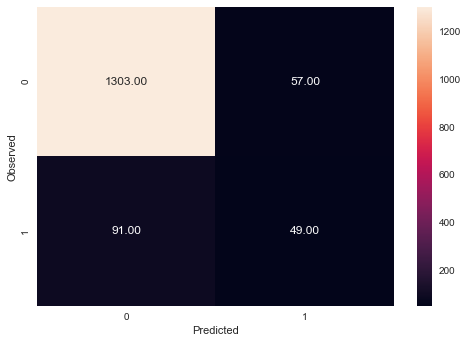

None

Recall: 0.35

Precision: 0.46226415094339623

F1 Score: 0.3983739837398374

Roc Auc Score: 0.6540441176470588

              precision    recall  f1-score   support

           0     0.9347    0.9581    0.9463      1360
           1     0.4623    0.3500    0.3984       140

    accuracy                         0.9013      1500
   macro avg     0.6985    0.6540    0.6723      1500
weighted avg     0.8906    0.9013    0.8951      1500



In [879]:
print("Training accuracy",logreg.score(x_train,y_train))  
print()
print("Testing accuracy",logreg.score(x_test, y_test))
print()
print('Confusion Matrix')
print()
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))
print()
print(classification_report(y_test,y_predict,digits=4))

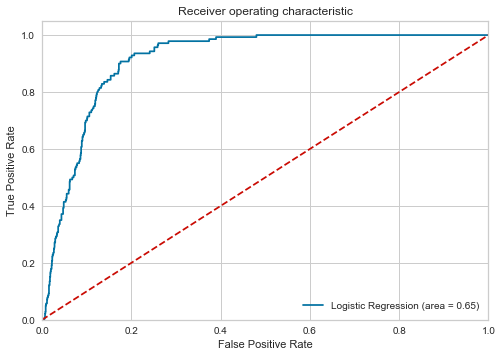

In [880]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### 5. Give your reasoning on how can the model perform better

In [881]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Comparing Various against solvers, which model is for US**

In [882]:
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train, y_train),3))
    test_score.append(round(model.score(x_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.911, 0.911, 0.903, 0.903, 0.903]

[0.901, 0.901, 0.907, 0.907, 0.907]


*The Training and Testing score are closer for any solver, so it's better,we can use any model*

In [883]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(x_train, y_train) 

y_predict = model.predict(x_test)     

print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))

Training accuracy 0.8625714285714285

Testing accuracy 0.842


*Model is not overfitting*

In [884]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(x_train, y_train) 
    y_predict = model.predict(x_test)     
    train_score.append(round(model.score(x_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(x_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.847, 0.861, 0.863, 0.863, 0.863, 0.863]

[0.827, 0.841, 0.842, 0.842, 0.842, 0.842]


Training accuracy 0.8617142857142858

Testing accuracy 0.842

Confusion Matrix


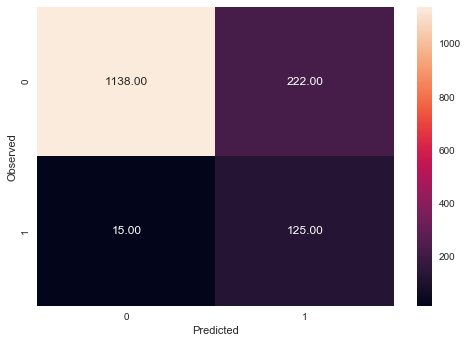

None

Recall: 0.8928571428571429

Precision: 0.36023054755043227

F1 Score: 0.5133470225872689

Roc Auc Score: 0.8648109243697479


In [885]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.15) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

**After doing changes in the logistic regression parameters, the model has improved, since ROC score was 0.65, now it's 0.86**

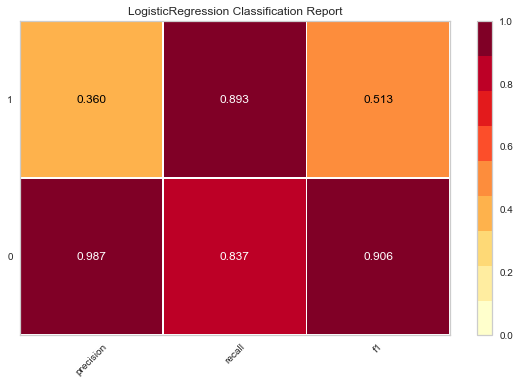

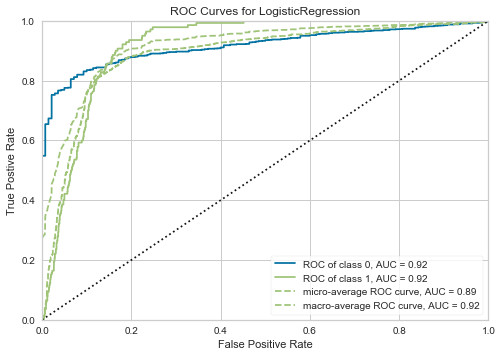

In [886]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

**The Recall value 0.8928571428571429 and ROC Curve is  0.8648109243697479 which is closer to 1. This model performs well**

### 6. Give Business understanding of your model

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted that customers will signup for personal loan if reached out

*False Positive (observed=0,predicted=1):*

Predicted that customers who will not signup for personal loan but will signup for the loan

*True Negative (observed=0,predicted=0):*

Customers in this category will not signup for the Personal Loan, the marketing department can focus on different group

*False Negative (observed=1,predicted=0):*

Predicted that customer will signup for personal loan but will not do so if reached out

Here the bank wants to give enagage another campign and want to target customers who will signup for the loan. Bank employees can focus on the target customer based on the model and desing campign based on the results. Since bank is not going to lose money in reaching out to more customers, the precison is not that important however the recall is the important metric.

My observation of the data, is the data seems to have more imbalance, since the percentage of personal loan signed up is only 10% of the given dataset. The data quality needs to be improved